In [12]:
import numpy as np
import cv2
import matplotlib as plt
import matplotlib.pyplot as plt
import torch
from  torch.utils.data import Dataset, DataLoader
import torchmetrics
from torchmetrics import Dice, JaccardIndex #IOU
import segmentation_models_pytorch as smp
import albumentations as A
# to convert np.array to torch.tensor
from albumentations.pytorch import ToTensorV2
# others
import os
# processing effecting
from tqdm import tqdm 
# read all images in a folder
from glob import glob

In [14]:
# declaration dataset
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

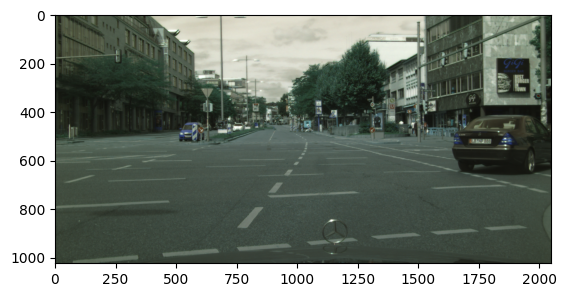

In [18]:
image_path = r"D:\DOC\23-24_HK02\MLAI\FINAL_EXAM\IMG\stuttgart_01_000000_003500_leftImg8bit.png"
image      = cv2.imread(image_path, cv2.IMREAD_COLOR)
plt.imshow(image)

In [11]:
import torch.nn as nn
import torch.nn.functional as F


class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))